In [1]:
import os
import sys
import nglview
#import prodigy
import pandas as pd
import requests
import re
import subprocess
import shlex
#import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [2]:
nglview.show_pdbid("6m0j")  # load "3pqr" from RCSB PDB and display viewer widget


NGLWidget()

In [3]:
nglview.show_pdbid("7chp")

NGLWidget()

In [4]:
#nglview.show_structure_file("6m0j_7chp.pdb")

In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
class Pdbesearch:
    """
    Class for querying interface information from PDB for a given PDB entry and assembly id
    """
    
    def __init__(self, pdb_id: str, assembly_id: str) -> None:
        """
        :param pdb_id: String
        :param assembly_id: Integer
        """
        self.search_url = 'https://www.ebi.ac.uk/pdbe/api/pisa/interfaces/'
        self.search_options = '&wt=json&rows=100000'
        self.pdb_id = pdb_id
        self.assembly_id = assembly_id


    def url_response(self, url: str) -> dict:
        """
        Getting JSON response from URL
        :param url: String
        :return: JSON
        """
        r = requests.get(url=url)
        # Status code 200 means 'OK'
        if r.status_code == 200:
            json_result = r.json()
            return json_result
        else:
            print(r.status_code, r.reason)
            return None

    def run_search(self) -> dict:
        """
        Running search and getting JSON response
        """

        full_query = self.search_url + self.pdb_id + "/" + self.assembly_id
        print(full_query)
        response = self.url_response(full_query)
        return response

    def get_interface_info(self, interface_id: int) -> dict:
        """
        Getting interface information from JSON response
        :param interface_id: Integer
        :return: Dictionary
        """
        response = self.run_search()
        info_dict = {
        "number_of_residues_at_interface" : response[self.pdb_id]['assembly']["interfaces"][interface_id]['number_interface_residues'],
        "number_of_hydrogen_bonds" : response[self.pdb_id]['assembly']["interfaces"][interface_id]['number_hydrogen_bonds'],
        "number_of_salt_bridges" : response[self.pdb_id]['assembly']["interfaces"][interface_id]['number_salt_bridges'],
        "number_of_disulfide_bonds" : response[self.pdb_id]['assembly']["interfaces"][interface_id]['number_disulfide_bonds'],
        "stabilisation_energy" : response[self.pdb_id]['assembly']["interfaces"][interface_id]['stabilization_energy'],
        "Interface_area" : response[self.pdb_id]['assembly']["interfaces"][interface_id]['interface_area'],
        }
        
        return info_dict
    
    def get_residues(self, bond_type: str, atom_site: str, interface_id: int) -> list:
        """
        Getting residues for certian bond type and atom site e.g. hydrogen bonds
        :param bond_type: String
        :param atom_site: String
        :param interface_id: Integer
        
        """
        response = self.run_search()
        uniprot_accesiion_id = set(response[self.pdb_id]['assembly']["interfaces"][interface_id][bond_type][f'{atom_site}_unp_accs'])
        print(f"Uniprot accesiion id of the chain is {uniprot_accesiion_id}")
        residues = response[self.pdb_id]['assembly']["interfaces"][interface_id][bond_type][f'{atom_site}_residues']
        
        residues_nums = response[self.pdb_id]['assembly']["interfaces"][interface_id][bond_type][f'{atom_site}_seq_nums']
        list_of_hydrogen_bonding_residues = [mn + str(n) for mn, n in zip(residues, residues_nums)]
        
        return list_of_hydrogen_bonding_residues
    
    


In [3]:
spike_protein_ace2 = Pdbesearch('6m0j', '1')
spike_protein_P5A = Pdbesearch('7chp', '1')

In [4]:
spike_protein_ace2_info = spike_protein_ace2.get_interface_info(0)
spike_protein_P5A_info = spike_protein_P5A.get_interface_info(1)

https://www.ebi.ac.uk/pdbe/api/pisa/interfaces/6m0j/1
https://www.ebi.ac.uk/pdbe/api/pisa/interfaces/7chp/1


In [5]:
df = pd.DataFrame([spike_protein_ace2_info, spike_protein_P5A_info]).T
df.columns = ['d{}'.format(i) for i, col in enumerate(df, 1)]
df = df.rename(columns={'d1': 'rbd_ace2', 'd2': 'rbd_abd'})



In [6]:
df

,rbd_ace2,rbd_abd
number_of_residues_at_interface,194.00,220.00
number_of_hydrogen_bonds,13.00,19.00
number_of_salt_bridges,1.00,2.00
number_of_disulfide_bonds,0.00,0.00
stabilisation_energy,-10.66,-8.62
Interface_area,843.51,697.18


In [7]:
residues_involved_in_hbonding_with_spike_protein= spike_protein_ace2.get_residues(atom_site="atom_site_2", bond_type="hydrogen_bonds", interface_id=0)
residues_involved_in_hbonding_with_spike_protein

https://www.ebi.ac.uk/pdbe/api/pisa/interfaces/6m0j/1
Uniprot accesiion id of the chain is {'P0DTC2'}


['GLY446',
 'TYR449',
 'ASN487',
 'TYR489',
 'GLY496',
 'THR500',
 'TYR505',
 'TYR449',
 'ASN487',
 'GLN493',
 'ASN501',
 'GLY502',
 'TYR505']

In [8]:
residues_involved_in_hbonding_with_P5A= spike_protein_P5A.get_residues(atom_site="atom_site_1", bond_type="hydrogen_bonds", interface_id=1)
residues_involved_in_hbonding_with_P5A

https://www.ebi.ac.uk/pdbe/api/pisa/interfaces/7chp/1
Uniprot accesiion id of the chain is {'P0DTC2'}


['ASN487',
 'SER477',
 'TYR473',
 'TYR421',
 'ARG457',
 'THR415',
 'LYS417',
 'TYR453',
 'ALA475',
 'ALA475',
 'LEU455',
 'TYR421',
 'ARG457',
 'TYR421',
 'ARG457',
 'ASP420',
 'ASN487',
 'ASN487',
 'TYR489']

In [9]:
all_residues_at_the_interface_ace2 = spike_protein_ace2.get_residues(atom_site="atom_site_2", bond_type="other_bonds", interface_id=0)
set(all_residues_at_the_interface_ace2)

https://www.ebi.ac.uk/pdbe/api/pisa/interfaces/6m0j/1
Uniprot accesiion id of the chain is {'P0DTC2'}


{'ALA475',
 'ASN487',
 'ASN501',
 'GLN493',
 'GLN498',
 'GLY446',
 'GLY496',
 'GLY502',
 'LEU455',
 'LYS417',
 'PHE456',
 'PHE486',
 'THR500',
 'TYR449',
 'TYR453',
 'TYR489',
 'TYR505'}

In [10]:
all_residues_at_the_interface_P5A = spike_protein_P5A.get_residues(atom_site="atom_site_1", bond_type="other_bonds", interface_id=1)
set(all_residues_at_the_interface_P5A)

https://www.ebi.ac.uk/pdbe/api/pisa/interfaces/7chp/1
Uniprot accesiion id of the chain is {'P0DTC2'}


{'ALA475',
 'ARG457',
 'ASN460',
 'ASN487',
 'ASP420',
 'GLN493',
 'GLY416',
 'GLY476',
 'LEU455',
 'LYS417',
 'LYS458',
 'PHE456',
 'PHE486',
 'SER477',
 'THR415',
 'TYR421',
 'TYR453',
 'TYR473',
 'TYR489'}

In [30]:
import sys

def get_mutations_info_from_uniprot(residue_list_to_query: list) -> dict:
    """
    Getting mutations information from Uniprot
    :param residue_list_to_query: list
    :return: Dictionary of residues with mutations information
    """
    dict_of_residues_with_mutations_info = {}
    for residue in residue_list_to_query:
        requestURL = f"https://www.ebi.ac.uk/proteins/api/mutagenesis/P0DTC2?location={residue[-3:]}"

        r = requests.get(requestURL, headers={ "Accept" : "application/json"})

        if not r.ok:
          r.raise_for_status()
          sys.exit()

        responseBody = r.json()
        if (responseBody["features"]):
           dict_of_residues_with_mutations_info[residue] = responseBody["features"][0]["alternativeSequence"]
    return dict_of_residues_with_mutations_info


In [12]:
dict_of_residues_with_mutations_info_ace2 = get_mutations_info_from_uniprot(list(set(all_residues_at_the_interface_ace2)))
dict_of_residues_with_mutations_info_ace2


{'ALA475': 'V',
 'LEU455': 'Y',
 'PHE456': 'L',
 'GLN493': 'Y',
 'TYR453': 'F',
 'TYR505': 'C',
 'PHE486': 'L',
 'ASN501': 'T',
 'GLY502': 'D',
 'GLY446': 'V',
 'GLN498': 'H',
 'LYS417': 'T'}

In [13]:
dict_of_residues_with_mutations_info_P5A = get_mutations_info_from_uniprot(list(set(all_residues_at_the_interface_P5A)))
dict_of_residues_with_mutations_info_P5A

{'LEU455': 'Y',
 'PHE456': 'L',
 'PHE486': 'L',
 'GLN493': 'Y',
 'SER477': 'NVPFSPDGK',
 'GLY476': 'NVPFSPDGK',
 'ALA475': 'V',
 'TYR473': 'NVPFSPDGK',
 'TYR453': 'F',
 'LYS417': 'T'}

In [15]:
list_of_amino_acids = ["ALA", "ARG", "ASN", "ASP", "CYS", "GLN", "GLU", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]

In [16]:
import ipykernel

In [17]:

from pymol import cmd




In [31]:
class RunInsilicoMutation:
    """
    Class for running insilico mutation on a given PDB entry and assembly id
    """
    
    def __init__(self, pdb_file: str, chain_id: str) -> None:
        """
        :param pdb_id: String
        :param assembly_id: Integer
        :param chain_id: String
        :param residue_number: String
        :param mutation: String
        """
        self.pdb_file = pdb_file
        self.chain_id = chain_id

    def _run_pymol_mutation(self, original_residue, amino_acid) -> None:
        """
        Running insilico mutation
        """
        os.makedirs(f"data_{self.pdb_file}", exist_ok=True)
        cmd.wizard("mutagenesis")
        cmd.load(self.pdb_file)
        cmd.get_wizard().set_mode(amino_acid)
        cmd.get_wizard().do_select(f"chain {self.chain_id} and resid {original_residue[-3:]}")
        cmd.get_wizard().apply()
        cmd.save(f"data_{self.pdb_file}/{(original_residue[0:3])}{original_residue[-3:]}_{(amino_acid)}-{self.pdb_file}.pdb")
        cmd.reinitialize()
    
    def run_pymol_mutation_on_files(self, dict_of_residues_with_mutations_info: dict, list_of_amino_acids: list) -> None:
        """
        Running insilico mutation on a list of residues
        :param dict_of_residues_with_mutations_info: Dictionary of residues with mutations information
        :param list_of_amino_acids: List of amino acids
        
        """
        for residue in dict_of_residues_with_mutations_info.keys():
            for amino_acid in list_of_amino_acids:
       
                try:
                    self._run_pymol_mutation(residue, amino_acid)
                except Exception as e:
                    print(e)
                    print(f"Could not mutate {residue} to {amino_acid}")
                    pass
        


In [27]:
RunInsilicoMutation("pdb6m0j.ent", "E").run_pymol_mutation_on_files(dict_of_residues_with_mutations_info_ace2, list_of_amino_acids)

 PyMOL not running, entering library mode (experimental)
Selected!
 Mutagenesis: no rotamers found in library.
Selected!
 Mutagenesis: 23 rotamers loaded.
 Rotamer 16/23, strain=32.54
Selected!
 Mutagenesis: 10 rotamers loaded.
 Rotamer 4/10, strain=19.29
Selected!
 Mutagenesis: 8 rotamers loaded.
 Rotamer 5/8, strain=9.94
Selected!
 Mutagenesis: 3 rotamers loaded.
 Rotamer 3/3, strain=9.26
Selected!
 Mutagenesis: 17 rotamers loaded.
 Rotamer 10/17, strain=20.56
Selected!
 Mutagenesis: 18 rotamers loaded.
 Rotamer 18/18, strain=19.75
Selected!
 Mutagenesis: no rotamers found in library.
Selected!
 Mutagenesis: 8 rotamers loaded.
 Rotamer 8/8, strain=28.78
Selected!
 Mutagenesis: 6 rotamers loaded.
 Rotamer 3/6, strain=25.17
Selected!
 Mutagenesis: 3 rotamers loaded.
 Rotamer 3/3, strain=29.34
Selected!
 Mutagenesis: 17 rotamers loaded.
 Rotamer 10/17, strain=33.13
Selected!
 Mutagenesis: 14 rotamers loaded.
 Rotamer 11/14, strain=16.48
Selected!
 Mutagenesis: 4 rotamers loaded.
 Rotame

In [29]:
RunInsilicoMutation("pdb7chp.ent", "E").run_pymol_mutation_on_files(dict_of_residues_with_mutations_info_P5A, list_of_amino_acids)

Selected!
 Mutagenesis: no rotamers found in library.
Selected!
 Mutagenesis: 18 rotamers loaded.
 Rotamer 18/18, strain=14.70
Selected!
 Mutagenesis: 10 rotamers loaded.
 Rotamer 6/10, strain=7.23
Selected!
 Mutagenesis: 7 rotamers loaded.
 Rotamer 3/7, strain=7.91
Selected!
 Mutagenesis: 3 rotamers loaded.
 Rotamer 2/3, strain=20.14
Selected!
 Mutagenesis: 15 rotamers loaded.
 Rotamer 11/15, strain=15.64
Selected!
 Mutagenesis: 14 rotamers loaded.
 Rotamer 8/14, strain=17.13
Selected!
 Mutagenesis: no rotamers found in library.
Selected!
 Mutagenesis: 6 rotamers loaded.
 Rotamer 3/6, strain=18.76
Selected!
 Mutagenesis: 6 rotamers loaded.
 Rotamer 4/6, strain=14.21
Selected!
 Mutagenesis: 5 rotamers loaded.
 Rotamer 2/5, strain=10.28
Selected!
 Mutagenesis: 17 rotamers loaded.
 Rotamer 8/17, strain=16.01
Selected!
 Mutagenesis: 10 rotamers loaded.
 Rotamer 8/10, strain=23.44
Selected!
 Mutagenesis: 3 rotamers loaded.
 Rotamer 2/3, strain=26.42
Selected!
 Mutagenesis: 2 rotamers loade

In [32]:
class CalculateBindingEnergy():
    """
    Class for calculating binding energy for a given PDB entry using Prodigy
    """
    def __init__(self, directory: str) -> None:
        self.directory = directory
    
    def _calculate_binding_energy(self, pdb_file: str) -> str:
        """
        Calculating binding energy
        :param pdb_file: String
        :return: Binding enrgy calculate by Prodigy as String
        """
        full_filepath = f"{self.directory}/{pdb_file}"
        d = subprocess.run(shlex.split(f"prodigy {full_filepath}"), stdout=subprocess.PIPE)
        string = d.stdout.decode("utf-8")
        binding_energy = string.splitlines()[-2].split(":")[1]
        return binding_energy
    
    def calculate_binding_energy_for_all_files(self) -> dict:
        """
        Calculating binding energy for all files in a given directory
        :return: Dictionary of binding energy for each file
        """
        binding_energy_dict = {}
        for pdb_file in os.listdir(self.directory):
            binding_energy_dict[pdb_file] = self._calculate_binding_energy(pdb_file)
        return binding_energy_dict

In [21]:
spike_protein_binding_affinity_dict = CalculateBindingEnergy("data_pdb6m0j.ent").calculate_binding_energy_for_all_files()

data_pdb6m0j.ent/ALA475_ALA-pdb6m0j.ent.pdb
[+] Reading structure file: c:\Users\abhik\Documents\insta_deep\data_pdb6m0j.ent\ALA475_ALA-pdb6m0j.ent.pdb
[+] Parsed structure file ALA475_ALA-pdb6m0j.ent (2 chains, 791 residues)
[+] No. of intermolecular contacts: 66
[+] No. of charged-charged contacts: 3
[+] No. of charged-polar contacts: 10
[+] No. of charged-apolar contacts: 18
[+] No. of polar-polar contacts: 4
[+] No. of apolar-polar contacts: 21
[+] No. of apolar-apolar contacts: 10
[+] Percentage of apolar NIS residues: 35.06
[+] Percentage of charged NIS residues: 25.73
[++] Predicted binding affinity (kcal.mol-1):    -11.9
[++] Predicted dissociation constant (M) at 25.0˚C:  1.9e-09

data_pdb6m0j.ent/ALA475_ARG-pdb6m0j.ent.pdb
[+] Reading structure file: c:\Users\abhik\Documents\insta_deep\data_pdb6m0j.ent\ALA475_ARG-pdb6m0j.ent.pdb
[+] Parsed structure file ALA475_ARG-pdb6m0j.ent (2 chains, 791 residues)
[+] No. of intermolecular contacts: 73
[+] No. of charged-charged contacts:

In [23]:
P5A_spike_protein_binding_affinity_dict = CalculateBindingEnergy("data_pdb7chp.ent").calculate_binding_energy_for_all_files()

data_pdb7chp.ent/ALA475_ALA-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_ARG-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_ASN-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_ASP-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_CYS-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_GLN-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_GLU-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_GLY-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_HIS-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_ILE-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_LEU-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_LYS-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_MET-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_PHE-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_PRO-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_SER-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_THR-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_TRP-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_TYR-pdb7chp.ent.pdb
data_pdb7chp.ent/ALA475_VAL-pdb7chp.ent.pdb
data_pdb7chp.ent/GLN493_ALA-pdb7chp.ent.pdb
data_pdb7chp.ent/GLN493_ARG-pdb7chp.ent.pdb
data_pdb7chp.ent/GLN493_ASN-pdb7

In [33]:
def create_and_clean_dataframe(binding_affinity_dict: dict) -> pd.DataFrame:
    """
    Creating and cleaning dataframe
    :param binding_affinity_dict: Dictionary of binding energy for each file
    :return: Pivoted Dataframe ready to plot heatmap
    """
    df = pd.DataFrame(binding_affinity_dict.items(), columns=['pdb_file', 'binding_affinity'])
    df["pdb_file"] = df["pdb_file"].str.split("-").str[0]

    df[['original_residue', 'mutant']] = df.pdb_file.str.split("_", expand=True)
    df.drop(columns=["pdb_file"], inplace=True)
    df["binding_affinity"] = df["binding_affinity"].astype(float)
    mutant_pivot_table = df.pivot_table(index='mutant', columns='original_residue', values='binding_affinity', aggfunc='first')
    return mutant_pivot_table


In [48]:

spike_protein_ace2_mutant_table = create_and_clean_dataframe(spike_protein_binding_affinity_dict)
spike_protein_P5A_mutant_table = create_and_clean_dataframe(P5A_spike_protein_binding_affinity_dict)

<Axes: xlabel='original_residue', ylabel='mutant'>

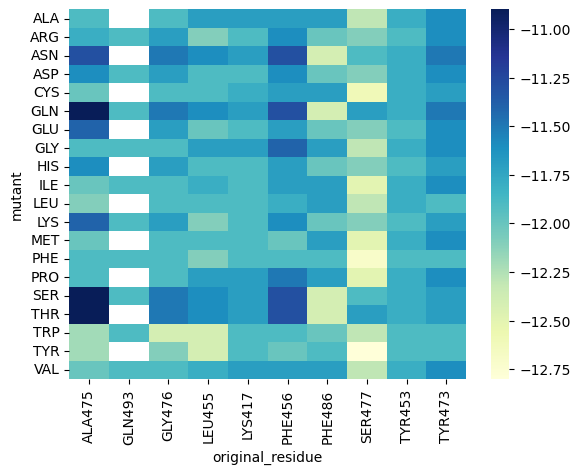

In [53]:
import seaborn as sns
sns.heatmap(spike_protein_ace2_mutant_table, cmap="YlGnBu")

<Axes: xlabel='original_residue', ylabel='mutant'>

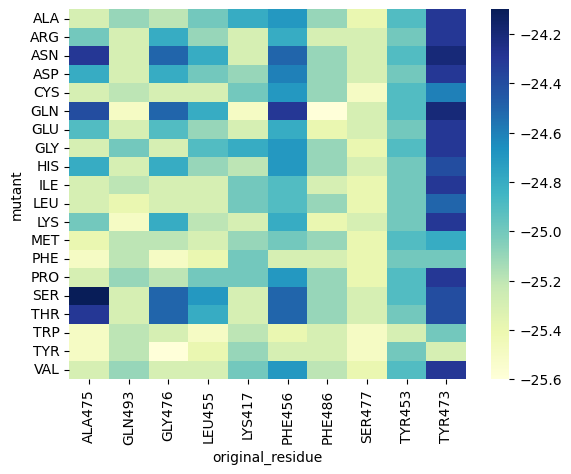

In [54]:
sns.heatmap(spike_protein_P5A_mutant_table, cmap="YlGnBu")

In [2]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from pdbfixer.pdbfixer import PDBFixer

from sys import stdout





In [43]:
import numpy as np
import matplotlib.pyplot as plt


In [37]:
class MDSimulation():
    """
    Class for running simulation using OpenMM
    """
    
    def __init__(self, data_dir: str, pdb_file: str) -> None:
        self.pdb_file_with_full_path = os.path.join(data_dir, pdb_file)
        print(self.pdb_file_with_full_path)
        self.log_file = os.path.join(data_dir, f"{pdb_file}_md_log.txt")
        self.fixed_pdb_file = os.path.join(data_dir, f"{pdb_file}_fixed.pdb")
        self.output_pdb_file = os.path.join(data_dir, f"{pdb_file}_output.pdb")

    
    def pdb_file_fixer(self)-> None:   
     
        fixer = PDBFixer(filename=self.pdb_file_with_full_path)
        print("finding nonstandard residues...")

        fixer.findNonstandardResidues()
        fixer.nonstandardResidues = [(residue, 'ALA') for residue, replacement in fixer.nonstandardResidues]
        fixer.replaceNonstandardResidues()
        print("find missing residues...")
        fixer.findMissingResidues()
        print("find missing atoms...")
        fixer.findMissingAtoms()
        print("replace nonstandard residues...")
        print("add missing atoms...")
        fixer.addMissingAtoms()
        fixer.removeHeterogens(False)
        print("add missing hydrogens...")
        fixer.addMissingHydrogens(7.0)
        maxSize = max(max((pos[i] for pos in fixer.positions))-min((pos[i] for pos in fixer.positions)) for i in range(3))
        boxSize = maxSize*Vec3(1, 1, 1)
        fixer.addSolvent(boxSize)
        PDBFile.writeFile(fixer.topology, fixer.positions, open(self.fixed_pdb_file, 'w'))
    
    def run_md_simulation(self) -> None:
        """
        Running simulation
        """
        pdb = PDBFile(self.fixed_pdb_file)
        forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')


        forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')


        # Combine the molecular topology and the forcefield
        system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
                nonbondedCutoff=1*nanometer, constraints=HBonds)

        # Create the integrator to use for advacing the equations of motion.
        # It specifies a Langevin integrator.
        # The paramters set are temperature, friction coefficient, and timestep.
        integrator = LangevinMiddleIntegrator(300*kelvin, 1/picosecond, 0.004*picoseconds)

        # Combines the molecular topology, system, and integrator
        # to begin a new simulation.
        simulation = Simulation(pdb.topology, system, integrator)
        simulation.context.setPositions(pdb.positions)

        # Perform local energy minimization
        print("Minimizing energy...")
        simulation.minimizeEnergy(maxIterations=100)

        # Write the trajectory to a file called "output.pdb"
        simulation.reporters.append(PDBReporter(self.output_pdb_file, 2000))

        # Report infomation to the screen as the simulation runs
        simulation.reporters.append(StateDataReporter(stdout, 100, step=True,
                potentialEnergy=True, temperature=True))

        #Run the simulation for 1000 timsteps


        # Report infomation to the screen as the simulation runs
        simulation.reporters.append(StateDataReporter(stdout, 100, step=True,
                potentialEnergy=True, temperature=True))

        simulation.reporters.append(StateDataReporter(self.log_file, 100, step=True,
                potentialEnergy=True, temperature=True))

        print("Running simulation...")
        simulation.step(2000)

        print("Done!")        
    
    def plot_energy(self) -> None:
        """
        Plotting energy
        """
        data = np.loadtxt(self.log_file, delimiter=',')
        print(data)

        step = data[:,0]
        potential_energy = data[:,1]
        temperature = data[:,2]

        plt.plot(step, potential_energy)
        plt.xlabel("Step")
        plt.ylabel("Potential energy (kJ/mol)")
        plt.show()
        plt.plot(step, temperature)
        plt.xlabel("Step")
        plt.ylabel("Temperature (K)")
        plt.show()

    

In [38]:
R = MDSimulation("data_pdb7chp.ent", "LYS417_VAL-pdb7chp.ent.pdb")
R.pdb_file_fixer()

data_pdb7chp.ent\LYS417_VAL-pdb7chp.ent.pdb
finding nonstandard residues...
find missing residues...
find missing atoms...
replace nonstandard residues...
add missing atoms...
add missing hydrogens...


In [39]:
R.run_md_simulation()

Minimizing energy...
Running simulation...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,-1921704.4847555733,170.24760110111237
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,-1921704.4847555733,170.24760110111237
200,-1887537.083050727,216.87008664400895
200,-1887537.083050727,216.87008664400895
300,-1862457.2932249496,246.568273230392
300,-1862457.2932249496,246.568273230392
400,-1845755.1477970718,263.62061662875
400,-1845755.1477970718,263.62061662875
500,-1832387.0543607057,274.7056174311815
500,-1832387.0543607057,274.7056174311815
600,-1822919.2093270568,280.87801867070993
600,-1822919.2093270568,280.87801867070993
700,-1817098.2949660306,288.46699701958374
700,-1817098.2949660306,288.46699701958374
800,-1811776.3441714079,291.6161294886699
800,-1811776.3441714079,291.6161294886699
900,-1807055.113817943,293.29062217296917
900,-1807055.113817943,293.29062217296917
1000,-1803559.7041587383,294.53881141457515
1000,-1803559.7041587383,294.53881141457515
110

[[ 1.00000000e+02 -1.92170448e+06  1.70247601e+02]
 [ 2.00000000e+02 -1.88753708e+06  2.16870087e+02]
 [ 3.00000000e+02 -1.86245729e+06  2.46568273e+02]
 [ 4.00000000e+02 -1.84575515e+06  2.63620617e+02]
 [ 5.00000000e+02 -1.83238705e+06  2.74705617e+02]
 [ 6.00000000e+02 -1.82291921e+06  2.80878019e+02]
 [ 7.00000000e+02 -1.81709829e+06  2.88466997e+02]
 [ 8.00000000e+02 -1.81177634e+06  2.91616129e+02]
 [ 9.00000000e+02 -1.80705511e+06  2.93290622e+02]
 [ 1.00000000e+03 -1.80355970e+06  2.94538811e+02]
 [ 1.10000000e+03 -1.80103692e+06  2.95989630e+02]
 [ 1.20000000e+03 -1.80033713e+06  2.96642260e+02]
 [ 1.30000000e+03 -1.79853139e+06  2.97773043e+02]
 [ 1.40000000e+03 -1.79727337e+06  2.98302948e+02]
 [ 1.50000000e+03 -1.79828313e+06  2.99859620e+02]
 [ 1.60000000e+03 -1.79710377e+06  2.99418080e+02]
 [ 1.70000000e+03 -1.79637480e+06  2.99802839e+02]
 [ 1.80000000e+03 -1.79549793e+06  2.99460285e+02]
 [ 1.90000000e+03 -1.79533471e+06  3.00831376e+02]
 [ 2.00000000e+03 -1.79613227e+

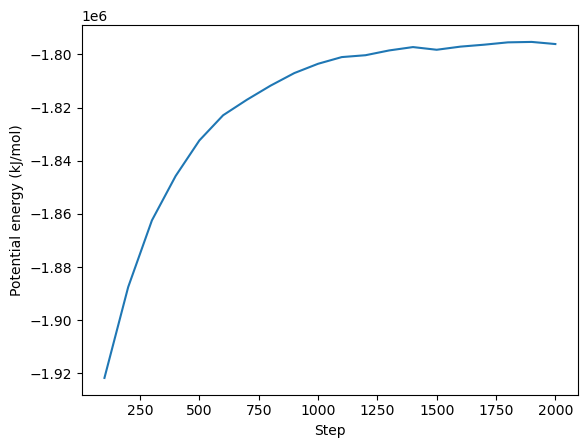

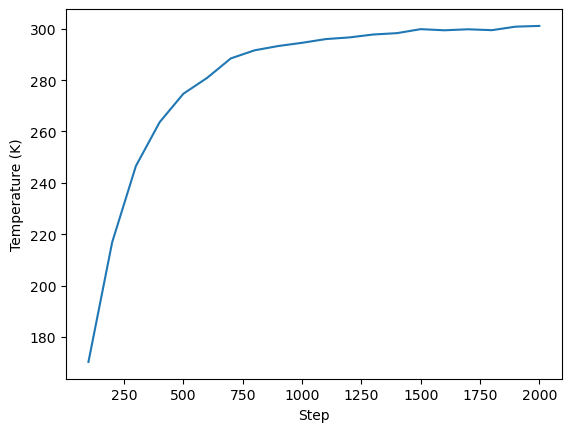

In [44]:
R.plot_energy()